In [1]:
# Install TensorFlow if not already installed
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.9 MB 16.7 MB/s eta 0:00:20
   ---------------------------------------- 2.6/331.9 MB 7.9 MB/s eta 0:00:42
    --------------------------------------- 4.5/331.9 MB 7.3 MB/s eta 0:00:46
    --------------------------------------- 5.8/331.9 MB 6.9 MB/s eta 0:00:48
    --------------------------------------- 6.8/331.9 MB 6.6 MB/s eta 0:00:50
    --------------------------------------- 7.6/331.9 MB 6.3 MB/s eta 0:00:52
   - -------------------------------------- 8.7/331.9 MB 5.8 MB/s eta 0:00:56
   - -------------------------------------- 9.4/331.9 MB 5.7 MB/s eta 0:00:57
   - -------------------------------------- 10.5/331.9 MB 5.5 MB/s eta 0:00:59
   - -------------------------------------- 11.3/331.9 MB 5.3 MB/s eta 0:01:01
   - -------------------------------------- 12.1/331.9 MB 5.2 MB/s eta 0:01:02
   - -------------------------------------- 13.1/331.9 MB 5.1 MB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.1 which is incompatible.


C:\Users\kotha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          23,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,409 (99.25 KB)

 Trainable params: 25,409 (99.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1504/1504 - 14s - 9ms/step - accuracy: 0.9216 - loss: 0.1822 - val_accuracy: 0.9445 - val_loss: 0.1357
Epoch 2/50
1504/1504 - 12s - 8ms/step - accuracy: 0.9467 - loss: 0.1305 - val_accuracy: 0.9484 - val_loss: 0.1355
Epoch 3/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9505 - loss: 0.1209 - val_accuracy: 0.9521 - val_loss: 0.1198
Epoch 4/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9537 - loss: 0.1143 - val_accuracy: 0.9536 - val_loss: 0.1110
Epoch 5/50
1504/1504 - 11s - 7ms/step - accuracy: 0.9545 - loss: 0.1113 - val_accuracy: 0.9561 - val_loss: 0.1086
Epoch 6/50
1504/1504 - 9s - 6ms/step - accuracy: 0.9557 - loss: 0.1080 - val_accuracy: 0.9553 - val_loss: 0.1128
Epoch 7/50
1504/1504 - 11s - 7ms/step - accuracy: 0.9569 - loss: 0.1058 - val_accuracy: 0.9585 - val_loss: 0.1008
Epoch 8/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9574 - loss: 0.1026 - val_accuracy: 0.9558 - val_loss: 0.1037
Epoch 9/50
1504/1504 - 9s - 6ms/step - accuracy: 0.9582 - loss: 0.1006 - val_accuracy: 0.

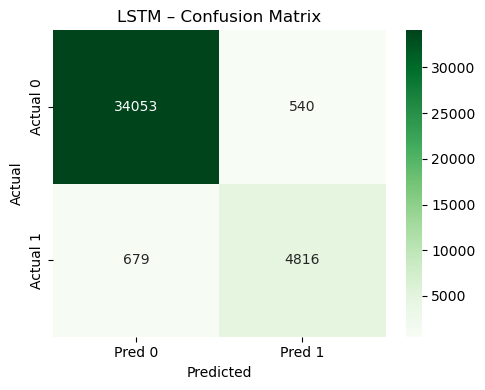

ROC AUC Score: 0.9927


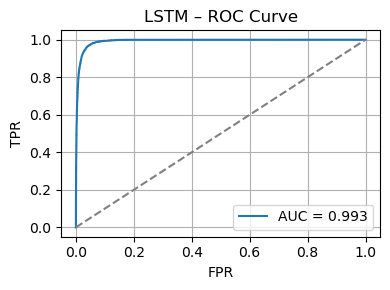

Precision-Recall AUC: 0.9516


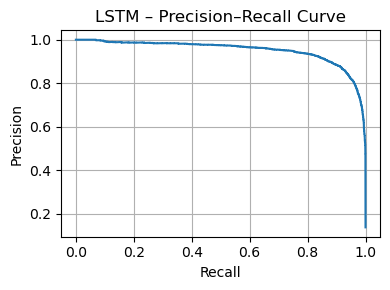

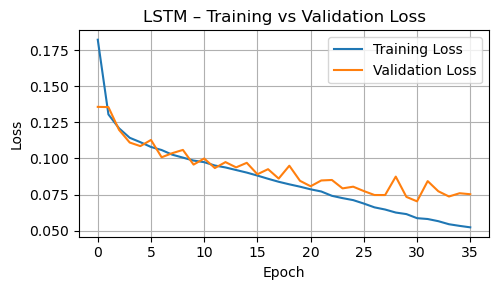

In [1]:

# =============================
# Import Libraries
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =============================
# Load Dataset
# =============================
dataset_path = r"C:\Users\kotha\OneDrive\Desktop\CombinedData\combined_turbo_fan_data_with_RUL_and_Failure.csv"
df = pd.read_csv(dataset_path)

# =============================
# Preprocessing
# =============================
# Drop irrelevant columns
df_lstm = df.drop(columns=["unit_number", "RUL"], errors="ignore")

# Features and target
X = df_lstm.drop(columns=["Failure"]).values
y = df_lstm["Failure"].values

# Encode categorical if any
for i, col in enumerate(df_lstm.drop(columns=["Failure"]).columns):
    if df_lstm[col].dtype == "object":
        X[:, i] = LabelEncoder().fit_transform(X[:, i])
X = X.astype(float)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =============================
# Create sequences for LSTM
# =============================
sequence_length = 10  # number of previous timesteps
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.25, random_state=42, stratify=y_seq
)

# =============================
# Build LSTM Model
# =============================
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# =============================
# Train LSTM Model
# =============================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

# =============================
# Evaluate LSTM Model
# =============================
y_prob_lstm = lstm_model.predict(X_test).flatten()
threshold = 0.55
y_pred_lstm = (y_prob_lstm > threshold).astype(int)

# Classification report
print("\n===== LSTM – Classification Report =====")
print(classification_report(y_test, y_pred_lstm))
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("LSTM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lstm)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("LSTM – ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_lstm)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("LSTM – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM – Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kotha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,777 (77.25 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1504/1504 - 15s - 10ms/step - accuracy: 0.9190 - loss: 0.1891 - val_accuracy: 0.9456 - val_loss: 0.1360
Epoch 2/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9443 - loss: 0.1357 - val_accuracy: 0.9491 - val_loss: 0.1241
Epoch 3/50
1504/1504 - 9s - 6ms/step - accuracy: 0.9498 - loss: 0.1224 - val_accuracy: 0.9520 - val_loss: 0.1192
Epoch 4/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9538 - loss: 0.1146 - val_accuracy: 0.9524 - val_loss: 0.1156
Epoch 5/50
1504/1504 - 10s - 6ms/step - accuracy: 0.9542 - loss: 0.1111 - val_accuracy: 0.9562 - val_loss: 0.1064
Epoch 6/50
1504/1504 - 13s - 9ms/step - accuracy: 0.9561 - loss: 0.1066 - val_accuracy: 0.9596 - val_loss: 0.1006
Epoch 7/50
1504/1504 - 12s - 8ms/step - accuracy: 0.9566 - loss: 0.1051 - val_accuracy: 0.9527 - val_loss: 0.1137
Epoch 8/50
1504/1504 - 10s - 7ms/step - accuracy: 0.9574 - loss: 0.1027 - val_accuracy: 0.9593 - val_loss: 0.0966
Epoch 9/50
1504/1504 - 8s - 6ms/step - accuracy: 0.9584 - loss: 0.1014 - val_accuracy: 0

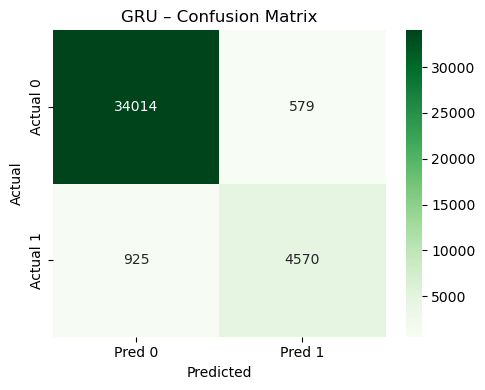

ROC AUC Score: 0.9899


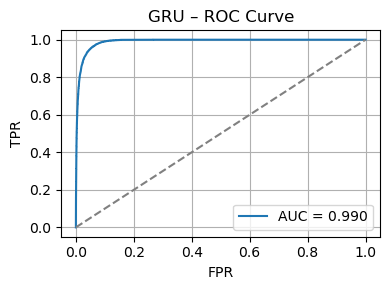

Precision-Recall AUC: 0.935


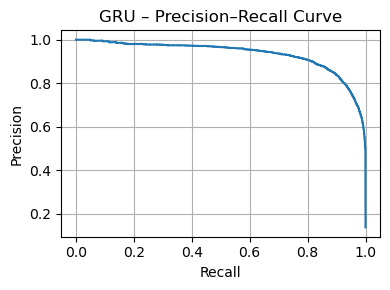

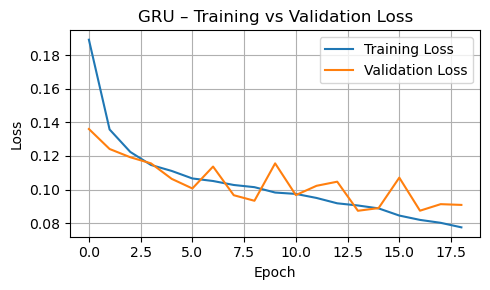

In [2]:
# =============================
# Import Libraries
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =============================
# Load Dataset
# =============================
dataset_path = r"C:\Users\kotha\OneDrive\Desktop\CombinedData\combined_turbo_fan_data_with_RUL_and_Failure.csv"
df = pd.read_csv(dataset_path)

# =============================
# Preprocessing
# =============================
df_gru = df.drop(columns=["unit_number", "RUL"], errors="ignore")

X = df_gru.drop(columns=["Failure"]).values
y = df_gru["Failure"].values

# Encode categorical features
for i, col in enumerate(df_gru.drop(columns=["Failure"]).columns):
    if df_gru[col].dtype == "object":
        X[:, i] = LabelEncoder().fit_transform(X[:, i])
X = X.astype(float)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =============================
# Create sequences for GRU
# =============================
sequence_length = 10
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.25, random_state=42, stratify=y_seq
)

# =============================
# Build GRU Model
# =============================
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()

# =============================
# Train GRU Model
# =============================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = gru_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

# =============================
# Evaluate GRU Model
# =============================
y_prob_gru = gru_model.predict(X_test).flatten()
threshold = 0.55
y_pred_gru = (y_prob_gru > threshold).astype(int)

print("\n===== GRU – Classification Report =====")
print(classification_report(y_test, y_pred_gru))
print("Accuracy:", accuracy_score(y_test, y_pred_gru))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gru)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("GRU – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gru)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("GRU – ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_gru)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("GRU – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU – Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kotha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 64)               │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1504/1504 - 6s - 4ms/step - accuracy: 0.9112 - loss: 0.2011 - val_accuracy: 0.9380 - val_loss: 0.1503
Epoch 2/50
1504/1504 - 5s - 3ms/step - accuracy: 0.9366 - loss: 0.1486 - val_accuracy: 0.9467 - val_loss: 0.1318
Epoch 3/50
1504/1504 - 6s - 4ms/step - accuracy: 0.9434 - loss: 0.1375 - val_accuracy: 0.9475 - val_loss: 0.1309
Epoch 4/50
1504/1504 - 6s - 4ms/step - accuracy: 0.9453 - loss: 0.1323 - val_accuracy: 0.9533 - val_loss: 0.1185
Epoch 5/50
1504/1504 - 5s - 4ms/step - accuracy: 0.9461 - loss: 0.1292 - val_accuracy: 0.9518 - val_loss: 0.1188
Epoch 6/50
1504/1504 - 5s - 3ms/step - accuracy: 0.9481 - loss: 0.1247 - val_accuracy: 0.9551 - val_loss: 0.1132
Epoch 7/50
1504/1504 - 5s - 3ms/step - accuracy: 0.9497 - loss: 0.1216 - val_accuracy: 0.9521 - val_loss: 0.1161
Epoch 8/50
1504/1504 - 6s - 4ms/step - accuracy: 0.9513 - loss: 0.1188 - val_accuracy: 0.9529 - val_loss: 0.1139
Epoch 9/50
1504/1504 - 5s - 3ms/step - accuracy: 0.9513 - loss: 0.1189 - val_accuracy: 0.9571 - 

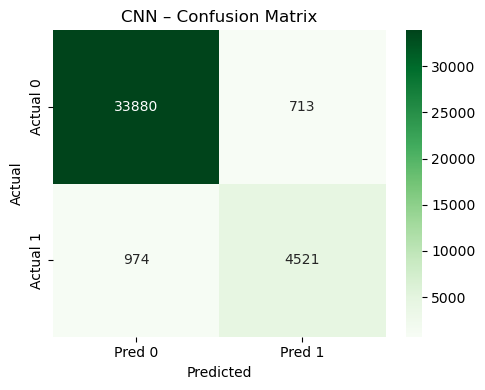

ROC AUC Score: 0.9877


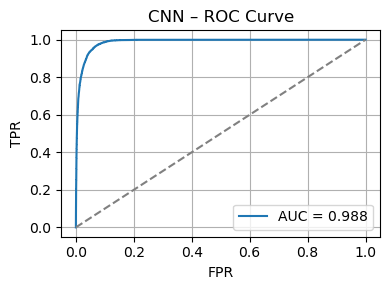

Precision-Recall AUC: 0.9212


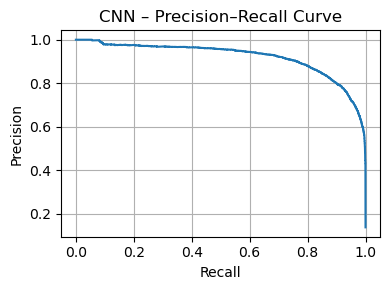

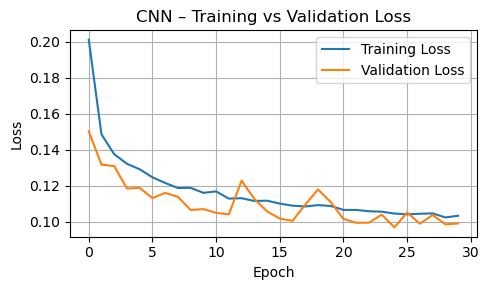

In [4]:
# =============================
# Import Libraries
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =============================
# Load Dataset
# =============================
dataset_path = r"C:\Users\kotha\OneDrive\Desktop\CombinedData\combined_turbo_fan_data_with_RUL_and_Failure.csv"
df = pd.read_csv(dataset_path)

# =============================
# Preprocessing
# =============================
df_cnn = df.drop(columns=["unit_number", "RUL"], errors="ignore")

X = df_cnn.drop(columns=["Failure"]).values
y = df_cnn["Failure"].values

# Encode categorical if any
for i, col in enumerate(df_cnn.drop(columns=["Failure"]).columns):
    if df_cnn[col].dtype == "object":
        X[:, i] = LabelEncoder().fit_transform(X[:, i])
X = X.astype(float)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =============================
# Create sequences for CNN
# =============================
sequence_length = 10
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.25, random_state=42, stratify=y_seq
)

# =============================
# Build CNN Model
# =============================
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# =============================
# Train CNN Model
# =============================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

# =============================
# Evaluate CNN Model
# =============================
y_prob_cnn = cnn_model.predict(X_test).flatten()
threshold = 0.55
y_pred_cnn = (y_prob_cnn > threshold).astype(int)

print("\n===== CNN – Classification Report =====")
print(classification_report(y_test, y_pred_cnn))
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("CNN – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_cnn)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("CNN – ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_cnn)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("CNN – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN – Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# =============================
# Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc

# =============================
# Collect Predictions for Deep Learning Models
# =============================

# LSTM
y_prob_lstm = lstm_model.predict(X_test).flatten()
y_pred_lstm = (y_prob_lstm > 0.55).astype(int)

# GRU
y_prob_gru = gru_model.predict(X_test).flatten()
y_pred_gru = (y_prob_gru > 0.55).astype(int)

# CNN
y_prob_cnn = cnn_model.predict(X_test).flatten()
y_pred_cnn = (y_prob_cnn > 0.55).astype(int)

# Transformer
y_prob_tf = transformer_model.predict(X_test).flatten()
y_pred_tf = (y_prob_tf > 0.55).astype(int)

# =============================
# Collect Metrics
# =============================
model_names = ["LSTM", "GRU", "CNN", "Transformer"]

accuracies = [
    accuracy_score(y_test, y_pred_lstm),
    accuracy_score(y_test, y_pred_gru),
    accuracy_score(y_test, y_pred_cnn),
    accuracy_score(y_test, y_pred_tf)
]

roc_aucs = [
    roc_auc_score(y_test, y_prob_lstm),
    roc_auc_score(y_test, y_prob_gru),
    roc_auc_score(y_test, y_prob_cnn),
    roc_auc_score(y_test, y_prob_tf)
]

pr_aucs = [
    auc(*precision_recall_curve(y_test, y_prob_lstm)[:2]),
    auc(*precision_recall_curve(y_test, y_prob_gru)[:2]),
    auc(*precision_recall_curve(y_test, y_prob_cnn)[:2]),
    auc(*precision_recall_curve(y_test, y_prob_tf)[:2])
]

# =============================
# Create Comparison DataFrame
# =============================
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "ROC-AUC": roc_aucs,
    "PR-AUC": pr_aucs
})

print("\n===== Deep Learning Models Comparison =====")
print(comparison_df)

# =============================
# Visualization: Accuracy
# =============================
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="viridis")
plt.title("Deep Learning Models Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# =============================
# Visualization: ROC-AUC
# =============================
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="ROC-AUC", data=comparison_df, palette="coolwarm")
plt.title("Deep Learning Models ROC-AUC")
plt.ylabel("ROC-AUC")
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# =============================
# Visualization: PR-AUC
# =============================
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="PR-AUC", data=comparison_df, palette="magma")
plt.title("Deep Learning Models PR-AUC")
plt.ylabel("PR-AUC")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


1253/1253 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


ValueError: x is neither increasing nor decreasing : [0.13707344 0.13707686 0.13708028 ... 1.         1.         1.        ].